In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pickle as pkl
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

df = pd.read_csv('/content/breast_cancer_self_check_data.csv')

print("done ...")

done ...


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df.describe()

,age,bmi,family_history,menopause_status,lump_present,lump_size,lump_fixed,lump_pain,nipple_discharge,skin_changes,nipple_retraction,breast_pain,swelling,hormonal_therapy,oral_contraceptives,alcohol_consumption,smoking,previous_biopsy,mammogram_history,diagnosis
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,51.825500,31.38848,0.303300,0.571100,0.153200,0.411880,0.093000,0.133500,0.144800,0.103300,0.047600,0.205100,0.100200,0.197200,0.139900,0.402800,0.245400,0.14770,0.703500,0.328900
std,19.574268,7.80923,0.459707,0.494944,0.360198,1.098707,0.290447,0.340131,0.351917,0.304366,0.212929,0.403795,0.300281,0.397905,0.346901,0.490486,0.430346,0.35482,0.456737,0.605278
min,18.000000,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,24.60000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,52.000000,31.30000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,69.000000,38.10000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,85.000000,45.00000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000


In [24]:
df

,age,bmi,family_history,menopause_status,lump_present,lump_size,lump_fixed,lump_pain,nipple_discharge,skin_changes,...,swelling,hormonal_therapy,oral_contraceptives,alcohol_consumption,smoking,physical_activity,previous_biopsy,mammogram_history,last_mammogram,diagnosis
0,32,18.7,0,0,0,0.0,0,0,1,0,...,0,0,0,0,0,moderate,0,0,NaN,1
1,38,36.8,0,0,1,2.0,0,0,0,0,...,0,1,0,0,1,moderate,1,0,NaN,0
2,47,38.9,1,0,1,2.2,1,1,0,0,...,0,0,0,0,0,low,0,1,2024-03-23,0
3,46,36.5,1,0,0,0.0,0,0,0,0,...,0,0,0,0,1,low,0,1,2024-10-25,2
4,51,38.2,0,1,0,0.0,0,0,1,0,...,0,0,0,0,0,moderate,0,1,2020-11-09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,84,32.6,1,1,0,0.0,0,0,0,0,...,0,0,0,0,1,high,0,1,2023-02-16,1
9996,81,28.6,0,1,0,0.0,0,0,0,1,...,0,0,0,1,0,moderate,1,1,2024-04-01,0
9997,22,30.6,1,0,0,0.0,0,0,0,0,...,1,0,0,0,0,moderate,1,0,NaN,0
9998,44,26.4,0,0,0,0.0,0,0,0,0,...,0,0,0,1,1,low,1,1,2021-09-15,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  int64  
 1   bmi                  10000 non-null  float64
 2   family_history       10000 non-null  int64  
 3   menopause_status     10000 non-null  int64  
 4   lump_present         10000 non-null  int64  
 5   lump_size            10000 non-null  float64
 6   lump_fixed           10000 non-null  int64  
 7   lump_pain            10000 non-null  int64  
 8   nipple_discharge     10000 non-null  int64  
 9   skin_changes         10000 non-null  int64  
 10  nipple_retraction    10000 non-null  int64  
 11  breast_pain          10000 non-null  int64  
 12  swelling             10000 non-null  int64  
 13  hormonal_therapy     10000 non-null  int64  
 14  oral_contraceptives  10000 non-null  int64  
 15  alcohol_consumption  10000 non-null  

# DATA CLEANING & FEATURE ENGINEERING

In [26]:
encoder = LabelEncoder()

df['PhysicalActivity'] = encoder.fit_transform(df['physical_activity'])
df = df.drop(columns=['physical_activity'],axis=1)

df.head()

,age,bmi,family_history,menopause_status,lump_present,lump_size,lump_fixed,lump_pain,nipple_discharge,skin_changes,...,swelling,hormonal_therapy,oral_contraceptives,alcohol_consumption,smoking,previous_biopsy,mammogram_history,last_mammogram,diagnosis,PhysicalActivity
0,32,18.7,0,0,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,NaN,1,2
1,38,36.8,0,0,1,2.0,0,0,0,0,...,0,1,0,0,1,1,0,NaN,0,2
2,47,38.9,1,0,1,2.2,1,1,0,0,...,0,0,0,0,0,0,1,2024-03-23,0,1
3,46,36.5,1,0,0,0.0,0,0,0,0,...,0,0,0,0,1,0,1,2024-10-25,2,1
4,51,38.2,0,1,0,0.0,0,0,1,0,...,0,0,0,0,0,0,1,2020-11-09,0,2


In [27]:
df['mammogram_recency'] = (
    (pd.to_datetime('today') - pd.to_datetime(df['last_mammogram']))
    .dt.days / 365.25   # convert days to years
)
df['mammogram_recency'] = np.trunc(df['mammogram_recency'])  # Truncate decimals
df['mammogram_recency'].fillna(-1, inplace=True)  # -1 for no history

df = df.drop(columns=['last_mammogram'],axis=1)

df.head(20)

/tmp/ipython-input-27-2338174811.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mammogram_recency'].fillna(-1, inplace=True)  # -1 for no history


,age,bmi,family_history,menopause_status,lump_present,lump_size,lump_fixed,lump_pain,nipple_discharge,skin_changes,...,swelling,hormonal_therapy,oral_contraceptives,alcohol_consumption,smoking,previous_biopsy,mammogram_history,diagnosis,PhysicalActivity,mammogram_recency
0,32,18.7,0,0,0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,-1.0
1,38,36.8,0,0,1,2.0,0,0,0,0,...,0,1,0,0,1,1,0,0,2,-1.0
2,47,38.9,1,0,1,2.2,1,1,0,0,...,0,0,0,0,0,0,1,0,1,1.0
3,46,36.5,1,0,0,0.0,0,0,0,0,...,0,0,0,0,1,0,1,2,1,0.0
4,51,38.2,0,1,0,0.0,0,0,1,0,...,0,0,0,0,0,0,1,0,2,4.0
5,50,44.2,1,0,0,0.0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,0.0
6,56,40.7,0,1,0,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2.0
7,28,20.3,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2.0
8,84,30.2,0,1,0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,4.0
9,78,24.6,0,1,0,0.0,0,0,0,0,...,0,0,0,1,0,0,1,1,2,3.0


In [28]:
x = df.drop(columns=['diagnosis'],axis=1)
y = df['diagnosis']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape

(8000, 21)

In [30]:
X_test.shape

(2000, 21)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# DATA VISUALIZATION

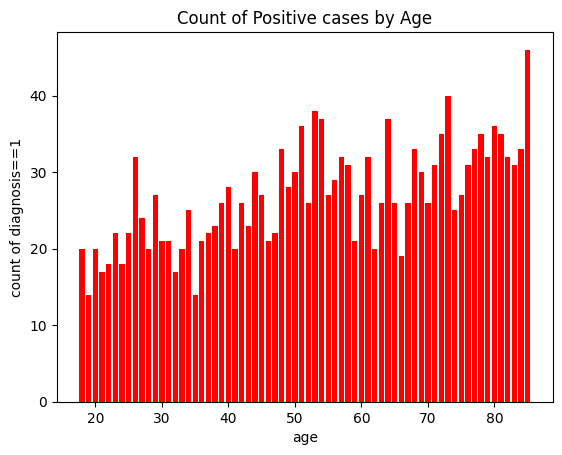

In [32]:
# Count of diagnosis==1 per age
age_counts = df[df['diagnosis'] == 1]['age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color='red')
plt.xlabel('age')
plt.ylabel('count of diagnosis==1')
plt.title('Count of Positive cases by Age')
plt.show()

from the figure we can tell that ages 20 - around 47 are least affected but ages above are mostly afected

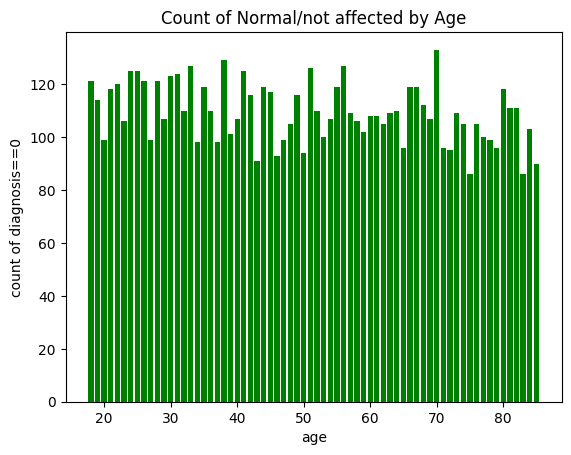

In [33]:
# Count of diagnosis==1 per age
age_counts = df[df['diagnosis'] == 0]['age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color='green')
plt.xlabel('age')
plt.ylabel('count of diagnosis==0')
plt.title('Count of Normal/not affected by Age')
plt.show()

From the figure we can tell that ages between 20 - 60 normal and the numbers keeps decreasing as the age increases

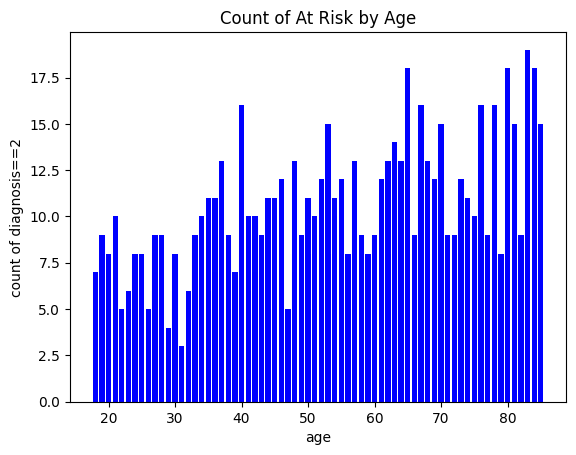

In [34]:
# Count of diagnosis==1 per age
age_counts = df[df['diagnosis'] == 2]['age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color='blue')
plt.xlabel('age')
plt.ylabel('count of diagnosis==2')
plt.title('Count of At Risk by Age')
plt.show()

We can tell the ages below 40 are least at risk but the numbers incease as age increases

# Modeling

In [35]:
# initializing the models

decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(random_state=21)
svc = SVC()
neighbors = KNeighborsClassifier()
naive = GaussianNB()
logistic = LogisticRegression()
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')

In [36]:
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
svc.fit(X_train, Y_train)
neighbors.fit(X_train, Y_train)
naive.fit(X_train, Y_train)
logistic.fit(X_train, Y_train)
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

Decision tree : 0.5815
SVC : 0.742
Random Forest : 0.733
K Nearest : 0.722
Naive Bayes : 0.6735
Logistic Regression : 0.7425
Tuned Logistic Regression : 0.7435


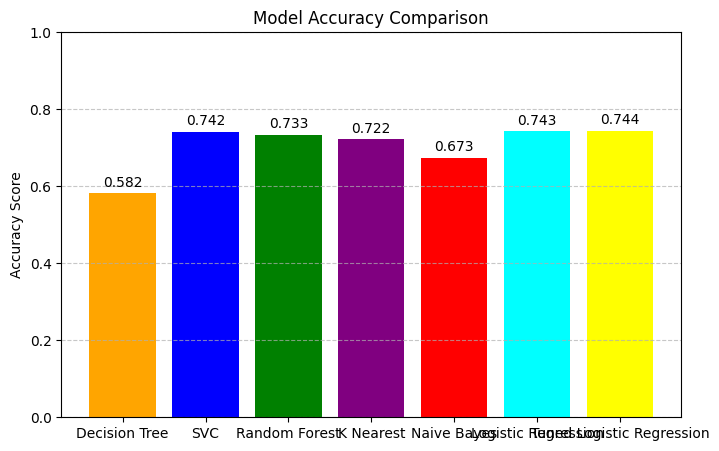

In [37]:
def runtest():
    decision_pred = decision_tree.predict(X_test)
    decision_acc = accuracy_score(Y_test, decision_pred)
    print(f'Decision tree : {decision_acc}')

    svc_pred = svc.predict(X_test)
    svc_acc = accuracy_score(Y_test, svc_pred)
    print(f'SVC : {svc_acc}')

    random_pred = random_forest.predict(X_test)
    random_acc = accuracy_score(Y_test, random_pred)
    print(f'Random Forest : {accuracy_score(Y_test, random_pred)}')

    neighbor_pred = neighbors.predict(X_test)
    neighbor_acc = accuracy_score(Y_test, neighbor_pred)
    print(f'K Nearest : {accuracy_score(Y_test, neighbor_pred)}')

    naive_pred = naive.predict(X_test)
    naive_acc = accuracy_score(Y_test, naive_pred)
    print(f'Naive Bayes : {accuracy_score(Y_test, naive_pred)}')

    logistic_pred = logistic.predict(X_test)
    logistic_acc = accuracy_score(Y_test, logistic_pred)
    print(f'Logistic Regression : {logistic_acc}')

    grid_search_pred = grid_search.predict(X_test)
    grid_search_acc = accuracy_score(Y_test, grid_search_pred)
    print(f'Tuned Logistic Regression : {grid_search_acc}')

    # Bar chart of model accuracies
    models = ['Decision Tree', 'SVC', 'Random Forest', 'K Nearest', 'Naive Bayes', 'Logistic Regression', 'Tuned Logistic Regression']
    accuracies = [decision_acc, svc_acc, random_acc, neighbor_acc, naive_acc, logistic_acc, grid_search_acc ]
    plt.figure(figsize=(8, 5))
    bars = plt.bar(models, accuracies, color=['orange', 'blue', 'green', 'purple', 'red', 'cyan', "yellow"])
    plt.ylim(0, 1)
    plt.ylabel('Accuracy Score')
    plt.title('Model Accuracy Comparison')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc:.3f}', ha='center', va='bottom')

    plt.show()

    model = "self_check_breast_cancer_model.pkl"
    with open(model, 'wb') as file:
        pkl.dump(logistic, file)


runtest()

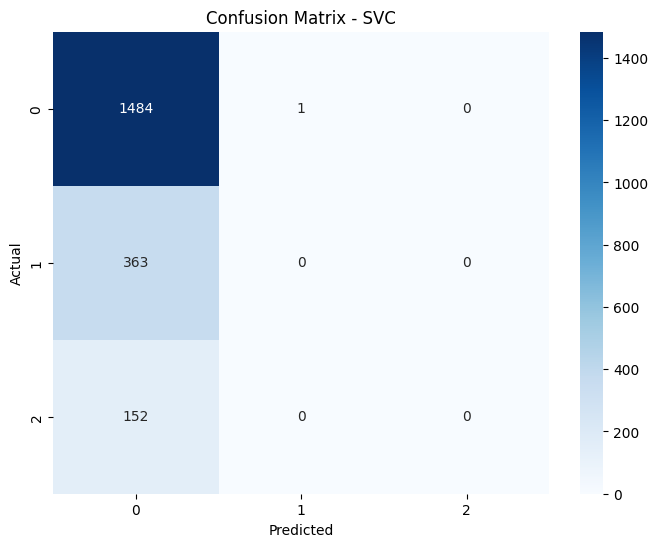

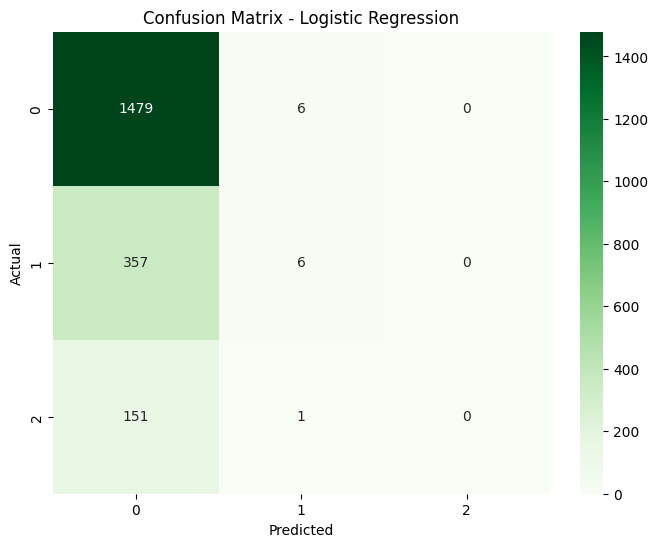

In [38]:
# prompt: plot cofusion matrix for svc and logistic regression using seaborn

import seaborn as sns

# Predictions for SVC and Logistic Regression
svc_pred = svc.predict(X_test)
logistic_pred = logistic.predict(X_test)

# Confusion Matrix for SVC
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, svc_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, logistic_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
